## Creating mean ensembles from submission files

In [1]:
# 사용법: 
# 1) 스크립트를 실행하기 전에 submissions 폴더를 먼저 만듭니다. 
# 2) 앙상블할 submission 화일을 submissions 폴더에 저장합니다.
# 3) 실행하면 현재 폴더에 앙상블한 submission 화일이 생성됩니다.

P = 1             # 이 값에 따라 성능이 달라짐 (P=1: 산술평균, P>1: 멱평균)
USE_RANK = False    # 확률을 순위로 변경하여 앙상블 하는가 여부
WEIGHT = [] #[0.79909, 0.80767, 0.80108, 0.80711]  # 가중치 지정안할 경우: WEIGHT = []

'p1mean_submission_1125_1145.csv' is ready to submit.


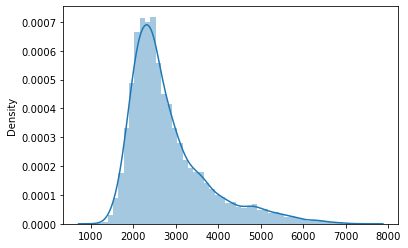

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")

# 아래 폴더가 있다는 가정 하에 수행
folder = 'submissions'
nf = 0
for f in os.listdir(folder):
    ext = os.path.splitext(f)[-1]
    if ext == '.csv': 
        s = pd.read_csv(folder+"/"+f)
        if USE_RANK: 
            s.iloc[:,1] = s.iloc[:,1].rank() / s.shape[0]
        if len(WEIGHT) > 0:
            s.iloc[:,1] = s.iloc[:,1] * (WEIGHT[nf] / sum(WEIGHT))       
    else: 
        continue
    if nf == 0: 
        slist = s
    else: 
        slist = pd.merge(slist, s, on="ID")
    nf += 1
    
if nf >= 2:
    pred = 0
    for j in range(nf):
        pred = pred + slist.iloc[:,j+1]**P 
    pred = pred / nf    
    pred = pred**(1/P)  
    t = pd.Timestamp.now()
    fname = f"p{P}mean_submission_{t.month:02}{t.day:02}_{t.hour:02}{t.minute:02}.csv"
    pd.DataFrame({'ID': slist.ID, 'Salary': pred}).to_csv(fname, index=False)
    print(f"'{fname}' is ready to submit.") 
    
    sns.distplot(pd.DataFrame(pred))       

### End